In [1]:
# import important libraries 

In [2]:
import numpy as np 

In [3]:
import pandas as pd 

In [4]:
import matplotlib.pyplot as plt 

In [5]:
import seaborn as sns 

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LinearRegression 

In [9]:
from sklearn.linear_model import Lasso

In [10]:
from sklearn import metrics

data collection and preprocessing 

In [11]:
df= pd.read_csv(r"/Users/adityarounak/Downloads/archive (7)/car data.csv")

In [12]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [14]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [20]:
df.Fuel_Type.value_counts(),df.Seller_Type.value_counts(),df.Transmission.value_counts()

(Fuel_Type
 Petrol    239
 Diesel     60
 CNG         2
 Name: count, dtype: int64,
 Seller_Type
 Dealer        195
 Individual    106
 Name: count, dtype: int64,
 Transmission
 Manual       261
 Automatic     40
 Name: count, dtype: int64)

encoding - means to give the value which is easily to understand by the system to give fruitful result 

In [27]:
df.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}}, inplace= True)

In [28]:
df.replace({"Seller_Type":{"Dealer":0,"Individual":1}}, inplace= True)

In [29]:
df.replace({"Transmission":{"Manual":0,"Automatic":1}}, inplace= True)

In [30]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


In [60]:
df.drop(["Car_Name"],axis=1, inplace = True)

now train_test_split

In [61]:
X= df.drop(["Selling_Price"],axis=1)

In [62]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [63]:
y= df[["Selling_Price"]]

In [64]:
y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


In [65]:
X_train,X_test,Y_train,Y_test= train_test_split(X,y, test_size= 0.2, random_state=42)

In [66]:
# model training

In [67]:
# call linear regression 

In [68]:
lin_regress_model= LinearRegression()

In [69]:
lin_regress_model.fit(X_train,Y_train)

LinearRegression()

In [70]:
# prediction of train data 
# modle evaluation

In [72]:
train_data_prediction= lin_regress_model.predict(X_train)

In [73]:
# r squared error 

In [74]:
error_score= metrics.r2_score(Y_train,train_data_prediction)

In [75]:
error_score

0.8839793496750796

In [76]:
# visualization of the actual price and the predicted price of train data

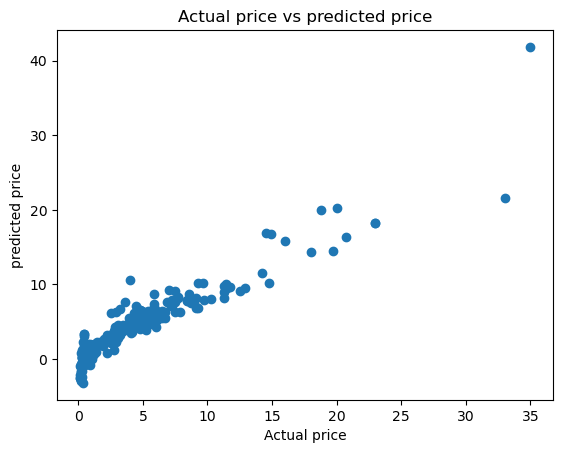

In [78]:
plt.scatter(Y_train,train_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("Actual price vs predicted price")
plt.show()

In [79]:
# prediction of test_data

In [82]:
test_data_prediction=lin_regress_model.predict(X_test)

In [83]:
# r2 score for prediction of test data 

In [90]:
error_score1= metrics.r2_score(Y_test,test_data_prediction)

In [91]:
error_score1

0.8468053957653994

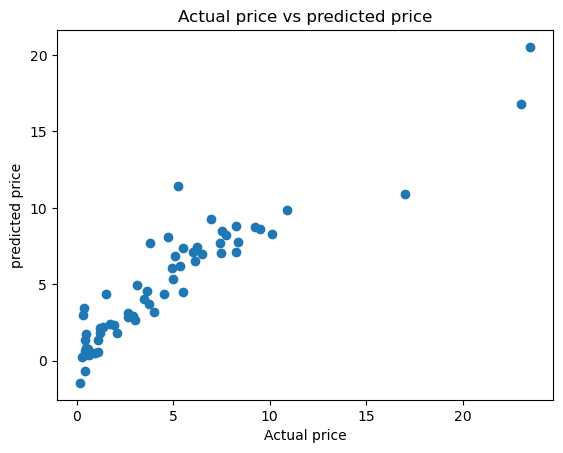

In [92]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("Actual price vs predicted price")
plt.show()

lasso regression

In [93]:
lasso_model= Lasso()

In [94]:
lasso_model.fit(X_train,Y_train)

Lasso()

In [95]:
# prediction of train data 
# modle evaluation

In [99]:
train_data_prediction1= lasso_model.predict(X_train)

In [100]:
# r squared error 

In [102]:
error_score2= metrics.r2_score(Y_train,train_data_prediction1)

In [103]:
error_score2

0.848030286813716

In [104]:
# visualization of the actual price and the predicted price of train data

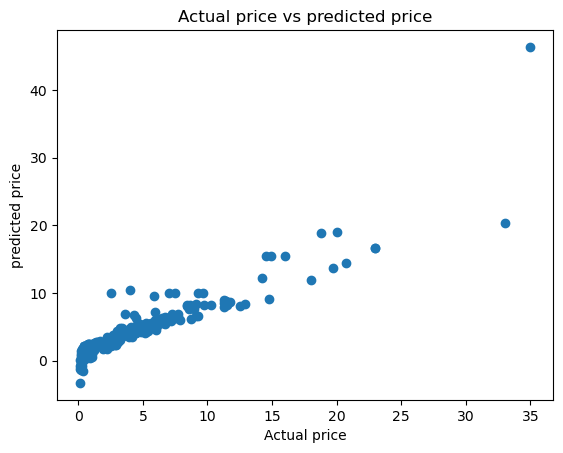

In [105]:
plt.scatter(Y_train,train_data_prediction1)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("Actual price vs predicted price")
plt.show()

In [106]:
# prediction of test_data

In [107]:
test_data_prediction2=lasso_model.predict(X_test)

In [108]:
error_score3= metrics.r2_score(Y_test,test_data_prediction2)

In [109]:
error_score3

0.7985512461284677

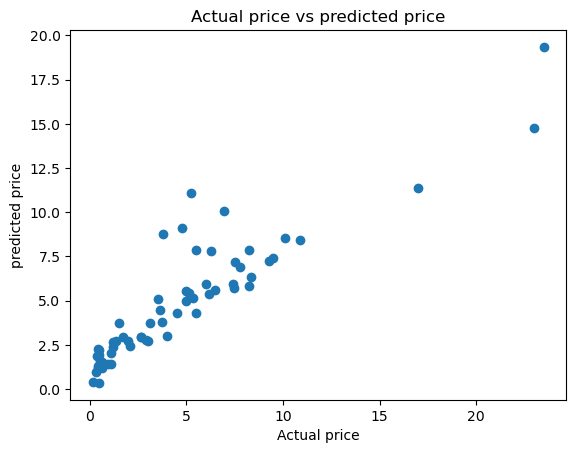

In [110]:
plt.scatter(Y_test,test_data_prediction2)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("Actual price vs predicted price")
plt.show()